<a href="https://colab.research.google.com/github/gagan3012/notebooks/blob/master/Notebooks/sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
with open("/content/Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = [json.loads(line) for line in open('/content/Sarcasm_Headlines_Dataset.json', 'r')]

sentences = []
labels = []
urls=[]

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
625/625 [==============================] - 25s 24ms/step - loss: 0.4627 - accuracy: 0.7711 - val_loss: 0.3405 - val_accuracy: 0.8514
Epoch 2/30
625/625 [==============================] - 14s 22ms/step - loss: 0.3043 - accuracy: 0.8801 - val_loss: 0.3653 - val_accuracy: 0.8483
Epoch 3/30
625/625 [==============================] - 14s 22ms/step - loss: 0.2813 - accuracy: 0.8715 - val_loss: 0.3880 - val_accuracy: 0.8442
Epoch 4/30
625/625 [==============================] - 14s 22ms/step - loss: 0.2082 - accuracy: 0.9225 - val_loss: 0.4248 - val_accuracy: 0.8427
Epoch 5/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1652 - accuracy: 0.9410 - val_loss: 0.4728 - val_accuracy: 0.8413
Epoch 6/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1444 - accuracy: 0.9503 - val_loss: 0.5323 - val_accuracy: 0.8375
Epoch 7/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1254 - accuracy: 0.9577 - val_loss: 0.5666 - val_accuracy:

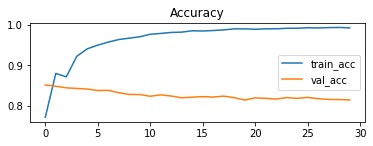

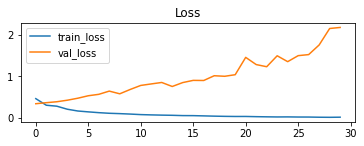

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(num_epochs)

import matplotlib.pyplot as plt


plt.subplot(2,1,1)
plt.plot(epochs,train_accuracy)
plt.plot(epochs,val_accuracy)
plt.legend(['train_acc','val_acc'])
plt.title('Accuracy')
plt.show()

plt.subplot(2,1,2)
plt.plot(epochs,train_loss)
plt.plot(epochs,val_loss)
plt.legend(['train_loss','val_loss'])
plt.title('Loss')
plt.show()

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.00060242]]


In [ ]:
model.save('model.h5')

In [ ]:
def input_to_model(sentence: list):
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    result = model.predict(padded)

    return {'data': result}



In [ ]:
input_to_model(["granny starting to fear spiders in the garden might be real"])

{'data': array([[0.00060242]], dtype=float32)}